In [1]:
print('hi')

hi


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2022-06-22 17:03:43.037595: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-22 17:03:43.122507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 17:03:43.122562: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# 데이터 구성부분
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]

print(len(x_train), len(x_test))
x_test

11490434/11490434 [==============================] - 2s 0us/step
60000 10000


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

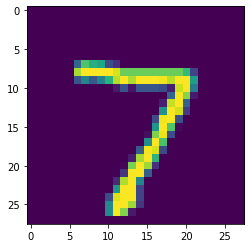

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [5]:
(32,32)

(32, 32)

In [6]:
from tensorflow.keras import layers, utils, Input


In [7]:
model = keras.Sequential()
model.add(layers.Conv2D(32,3,activation='relu',input_shape=(None,None,100)))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10,activation='softmax'))

model


2022-06-22 17:04:00.971586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-22 17:04:00.971636: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 17:04:00.971676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jammy): /proc/driver/nvidia/version does not exist
2022-06-22 17:04:00.972922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    28832     
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 47,978
Trainable params: 47,978
Non-trainable params: 0
_________________________________________________________________


In [9]:
import numpy as np
input_ = np.zeros((10,100,100,3))

In [10]:
from tensorflow.keras import layers, Input

In [11]:
linear = layers.Dense(20)
conv1 = layers.Conv2D(32, 3, activation='relu')
conv2 = layers.Conv2D(16, 3, activation='relu')
flatten = layers.Flatten()

In [12]:
x = conv1(input_)
x = conv2(x)
x = flatten(x)
x = linear(x)
x

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [13]:
input_ = Input((100,100,3))
input_

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_1')>

In [14]:
x = conv1(input_)
x = conv2(x)
x = flatten(x)
x = linear(x)
x

<KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'dense_1')>

In [15]:
from tensorflow.keras import Model

model = Model(inputs=input_, outputs = x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense_1 (Dense)             (None, 20)                2949140   
                                                                 
Total params: 2,954,660
Trainable params: 2,954,660
Non-trainable params: 0
_________________________________________________________________


In [17]:
model(input_)

<KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'model')>

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense_1 (Dense)             (None, 20)                2949140   
                                                                 
Total params: 2,954,660
Trainable params: 2,954,660
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.utils import plot_model
help(plot_model)

Help on function plot_model in module keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, layer_range=None, show_layer_activations=False)
    Converts a Keras model to dot format and save to a file.
    
    Example:
    
    ```python
    input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
    x = tf.keras.layers.Embedding(
        output_dim=512, input_dim=10000, input_length=100)(input)
    x = tf.keras.layers.LSTM(32)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
    model = tf.keras.Model(inputs=[input], outputs=[output])
    dot_img_file = '/tmp/model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
    ```
    
    Args

In [20]:
!pip install pydot

In [21]:
help(keras.Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [22]:
import numpy as np
input_ = np.zeros((10,100,100,3))
input_

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [23]:
input_ = Input(shape=(100,100,3))

In [24]:
input_

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_2')>

In [25]:
linear1 = layers.Conv2D(32,3,activation='relu')
hi = linear1(input_)
hi
flatten = layers.Flatten()
hi = flatten(hi)
hi

<KerasTensor: shape=(None, 307328) dtype=float32 (created by layer 'flatten_1')>

In [26]:
input_.reshape(-1,100,100,3)

AttributeError: 'KerasTensor' object has no attribute 'reshape'

In [ ]:
hi = tf.constant(input_.reshape(-1,100,100,3))

In [ ]:
hi = tf.cast(hi,dtype=tf.dtypes.float64)
hi

In [ ]:
linear1(hi)

In [ ]:
import pandas as pd

dic = {'hi':['sli','sli','woihg'],'hihi':['skiuh','sliuhe','swliuhe']}


In [ ]:
df = pd.DataFrame(dic)
# df.to_dict()
df

,hi,hihi
0,sli,skiuh
1,sli,sliuhe
2,woihg,swliuhe


In [ ]:
df['hi'] + df['hihi']

0        sliskiuh
1       slisliuhe
2    woihgswliuhe
dtype: object

In [ ]:
def f(x):
    return x[::-1]

In [ ]:
df['what'] = df['hi'].apply(f)
df

,hi,hihi,what
0,sli,skiuh,ils
1,sli,sliuhe,ils
2,woihg,swliuhe,ghiow


In [27]:

class CustomModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = keras.layers.Conv2D(16, 3, activation='relu')
        self.maxpool1 = keras.layers.MaxPool2D((2,2))
        self.conv2 = keras.layers.Conv2D(32, 3, activation='relu')
        self.maxpool2 = keras.layers.MaxPool2D((2,2))
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(256, activation='relu')
        self.fc2 = keras.layers.Dense(100, activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x
        
model = CustomModel()

In [28]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1801 - accuracy: 0.9470
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 3/5
 362/1875 [====>.........................] - ETA: 56s - loss: 0.0299 - accuracy: 0.9903

KeyboardInterrupt: 

In [32]:
conv = model.get_layer('conv2d_5')
conv._trainable = False

In [34]:
conv = model.get_layer('conv2d_6')
conv.weights

[<tf.Variable 'custom_model/conv2d_6/kernel:0' shape=(3, 3, 16, 32) dtype=float32, numpy=
 array([[[[ 1.25078887e-01,  2.78015248e-02, -2.33017445e-01, ...,
           -2.70983964e-01, -1.52706176e-01,  5.37920110e-02],
          [-7.56899267e-02,  1.46566376e-01, -1.86523631e-01, ...,
           -8.01745281e-02, -7.82550573e-02,  1.14065625e-01],
          [-2.52362579e-01,  2.80316379e-02, -8.16269368e-02, ...,
           -1.35744736e-01, -3.38280313e-02,  3.53418551e-02],
          ...,
          [-1.60183877e-01, -2.77104042e-02, -6.57543615e-02, ...,
            5.76559305e-02, -3.27024865e-03,  3.95929776e-02],
          [-2.54543871e-01,  7.21685737e-02, -5.01246415e-02, ...,
           -4.62773107e-02, -1.22082993e-01,  7.83667117e-02],
          [ 1.23633355e-01, -9.70052034e-02, -1.47850752e-01, ...,
           -3.22059780e-01, -5.59226200e-02, -9.53446925e-02]],
 
         [[ 1.07545041e-01,  2.12029725e-01, -1.70932010e-01, ...,
           -1.55104071e-01, -1.59748495e-01, 

In [35]:
model.weights

[<tf.Variable 'custom_model/conv2d_5/kernel:0' shape=(3, 3, 1, 16) dtype=float32, numpy=
 array([[[[ 0.1249071 , -0.09342137, -0.10176703,  0.07485765,
            0.07001688, -0.21748419,  0.11641727,  0.06741447,
           -0.38208207,  0.21259475, -0.00220113,  0.06001128,
            0.16883196,  0.03653433, -0.18850005,  0.09117416]],
 
         [[ 0.14599757, -0.3016077 , -0.05793192, -0.00548347,
            0.08717285, -0.3176404 ,  0.09715287,  0.24237129,
           -0.28123277,  0.22667015,  0.0607455 ,  0.21145354,
            0.05839781,  0.11908037, -0.13383837,  0.25074017]],
 
         [[-0.08726311, -0.37464985,  0.16216415, -0.04632605,
            0.09925289,  0.06855186,  0.18939793,  0.01981679,
            0.09218055,  0.18419614,  0.36855334, -0.22439362,
           -0.26508728, -0.21804717, -0.18312201,  0.1288581 ]]],
 
 
        [[[-0.277027  ,  0.1418704 ,  0.00710752, -0.01144679,
           -0.13236894, -0.44407606, -0.18117677, -0.29492888,
           -0.

In [36]:
model.non_trainable_variables

[<tf.Variable 'custom_model/conv2d_5/kernel:0' shape=(3, 3, 1, 16) dtype=float32, numpy=
 array([[[[ 0.1249071 , -0.09342137, -0.10176703,  0.07485765,
            0.07001688, -0.21748419,  0.11641727,  0.06741447,
           -0.38208207,  0.21259475, -0.00220113,  0.06001128,
            0.16883196,  0.03653433, -0.18850005,  0.09117416]],
 
         [[ 0.14599757, -0.3016077 , -0.05793192, -0.00548347,
            0.08717285, -0.3176404 ,  0.09715287,  0.24237129,
           -0.28123277,  0.22667015,  0.0607455 ,  0.21145354,
            0.05839781,  0.11908037, -0.13383837,  0.25074017]],
 
         [[-0.08726311, -0.37464985,  0.16216415, -0.04632605,
            0.09925289,  0.06855186,  0.18939793,  0.01981679,
            0.09218055,  0.18419614,  0.36855334, -0.22439362,
           -0.26508728, -0.21804717, -0.18312201,  0.1288581 ]]],
 
 
        [[[-0.277027  ,  0.1418704 ,  0.00710752, -0.01144679,
           -0.13236894, -0.44407606, -0.18117677, -0.29492888,
           -0.

In [ ]:
lossfunc = tf.keras.losses.SparseCategoricalCrossentropy() + 100
optimizer = tf.keras.optimizers.Adagrad()

In [ ]:
with tf.GradientTape() as tape:
    prediction = model(x_test[:5])
    loss = lossfunc(y_test[:5],prediction)
    gradients = tape.gradient(loss,model.trainable_variables)
    print(tape)
    print(type(tape))

<class 'tensorflow.python.eager.backprop.GradientTape'>


In [ ]:
model.compile(loss='crossentropy',optimizer='adam')

In [ ]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=9.280365e-05>

In [ ]:
gradients

[<tf.Tensor: shape=(3, 3, 16, 32), dtype=float32, numpy=
 array([[[[ 3.53207383e-08, -4.78679576e-05, -5.95983965e-06, ...,
           -1.20810600e-05, -2.36422466e-07,  2.11602355e-07],
          [ 7.61394858e-09, -3.23368877e-05,  4.59060885e-07, ...,
            1.91003187e-06, -1.88888578e-07,  3.56259989e-07],
          [ 2.07319317e-08, -3.52601601e-05,  1.69797261e-06, ...,
           -1.26978011e-06, -5.61274817e-07,  5.57184535e-07],
          ...,
          [ 2.44233433e-08, -5.21468355e-05, -2.89246827e-07, ...,
           -2.11161455e-06, -1.80134577e-07,  1.09647090e-07],
          [-3.54165763e-07, -5.98258339e-05, -7.58038514e-05, ...,
           -2.32283528e-05, -9.85999213e-06,  1.35954806e-05],
          [ 5.54389885e-08, -4.84212724e-05, -3.59678197e-05, ...,
           -1.56738934e-05, -7.56505585e-07,  4.74171975e-06]],
 
         [[ 3.98292066e-08, -1.68873194e-05, -6.03292792e-05, ...,
           -1.49052994e-05, -4.66495976e-06,  7.70961469e-06],
          [ 1.4